### Selecting negative and positive controls for varchamp project

* Negative controls:
  - We want negative controls to have "no signatures" and since it is usually the case that negative controls that have low replicate correlations having no signature, we search by that rule.
  - We use Jump data to decide on negative controls (why?)
  - Niranj has taken the perturbations with low and checked the values based on CPjump1 and jumpproduction
  https://github.com/jump-cellpainting/pilot-cpjump1-analysis/issues/33
  - There are a couple of them that are low according to both datasets as shown in figure 1 in this notebook
  
  
* Positive controls
   - Jessie has sent the list of mislocalized variants 
   - There are six genes -> 'AKT1', 'ALK', 'BTK', 'CYP1A2', 'IMPDH1', 'SCNN1G' that are in both datasets
   - I have shown scatter plot of their rep cor according to cpjump1 dataset and their impact score 
  

In [22]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Negative control candidates
- As advised by Niranj and also discussed in profiling checkin on March 16, we believe cpjump results are more 

<IPython.core.display.Javascript object>


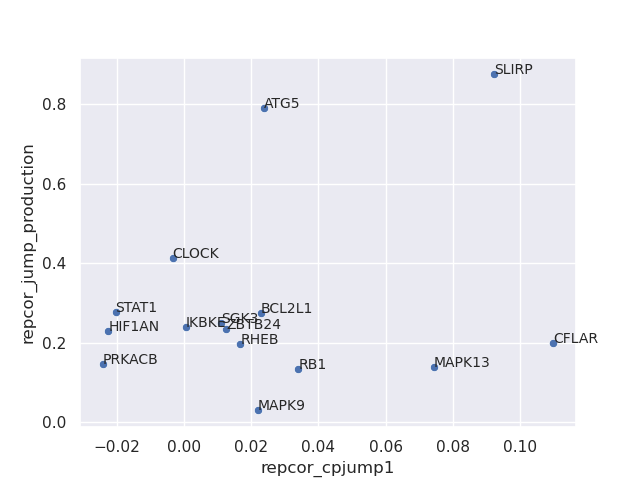

In [70]:
## rep cor for jump production iscopied from https://github.com/jump-cellpainting/pilot-cpjump1-analysis/issues/33
d = {'Metadata_genes': ['CLOCK','ATG5','SLIRP','STAT1','ZBTB24','HIF1AN','RHEB','SGK3','IKBKE',\
                        'BCL2L1','CFLAR','MAPK13','PRKACB','RB1','MAPK9'],\
     'repcor_jump_production': [0.412473,0.790692,0.874817,0.278034,0.233954,0.229508,0.196958,\
                               0.248357,0.239668,0.27349,0.199924,0.138837,0.145624,0.134494,0.0291882]}
jump_production_negcon_repcor = pd.DataFrame(data=d)


## rep cor for cpjump1 is gotten from Niranj (slack on March17,2022) and put on the metadata folder of the project
cpjump1_repcors= pd.read_csv(rootDir+'/metadata/cpjump1_all_orf_replicate_correlation.csv')
cpjump1_negcon_repcor=cpjump1_repcors[cpjump1_repcors['Metadata_genes'].isin(d['Metadata_genes'])].reset_index(drop=True)
negcon_repcor_df=pd.merge(cpjump1_negcon_repcor,jump_production_negcon_repcor,how='inner',on='Metadata_genes').\
rename(columns={'replicate_correlation':'repcor_cpjump1'})



plt.figure()
sns.scatterplot(data=negcon_repcor_df, y="repcor_jump_production", x="repcor_cpjump1")
negcon_genes=negcon_repcor_df['Metadata_genes'].tolist()
# Annotate label points 
for i, g_text in enumerate (negcon_genes):
    plt.annotate(g_text, (negcon_repcor_df.repcor_cpjump1[i],\
                          negcon_repcor_df.repcor_jump_production[i]),size=10)
plt.show()
# g.legend(loc='center left', bbox_to_anchor=(1, 1), ncol=2)
# plt.tight_layout()

## Positive control candidates
- 72 variants across 43 genes have manual impact score of 5 according to Jessie's data
- Among them ALK has 0.18 and IMPDH1: 0.19 and AKT1:0.11 replicate correlations according to cpjump data

<IPython.core.display.Javascript object>


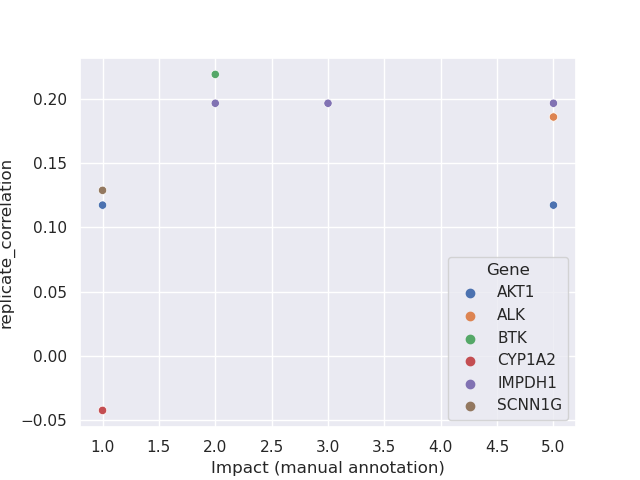

In [73]:
 # set root dit
rootDir='/home/ubuntu/bucket/projects/2021_09_01_VarCHAMP/workspace/'
# batch='2021_05_21_QualityControlPathwayArrayedScreen'

# read metadata 
misloc_vars_df= pd.read_excel(rootDir+'/metadata/Mislocalized_Variants.xlsx')
cpjump1_repcors= pd.read_csv(rootDir+'/metadata/cpjump1_all_orf_replicate_correlation.csv')

overlap_rare_jump=set(cpjump1_repcors['Metadata_genes'].unique()) & set(misloc_vars_df['Gene'].unique())

common_genes_df=misloc_vars_df[misloc_vars_df['Gene'].isin(overlap_rare_jump)].merge(cpjump1_repcors,\
                                                    left_on='Gene', right_on='Metadata_genes')

plt.figure();
sns.scatterplot(
    data=common_genes_df, x="Impact (manual annotation)", y="replicate_correlation",hue="Gene"
);

In [76]:
misloc_vars_df[misloc_vars_df['Impact (manual annotation)']==5]['Gene'].unique().shape

(43,)

In [10]:
misloc_vars_df['Impact (manual annotation)'].unique()

array([4, 3, 5, nan, 2, 1, 'N'], dtype=object)

In [78]:
common_genes_df[common_genes_df['Impact (manual annotation)']==5]

,Plate batch,Plate,Gene,Mutation,UNIQUE,Location,Efficiency,CC-prot first plate,CC-Prot replicate plate,Impact (manual annotation),Metadata_broad_sample,Metadata_genes,replicate_correlation
1,Cancer_Variants,RC4_IF_PC1_C06,AKT1,E267G,AKT1 E267G,"Cytoplasm, nucleoplasm, foci",high,0.881603,NaN,5,ccsbBroad304_14538,AKT1,0.117408
3,Kinase_Mutants,Kinase Mutants_IF_1_D07,ALK,F1174L,ALK F1174L,ER,med,-0.283469,0.408066,5,ccsbBroad304_14540,ALK,0.186023
4,Kinase_Mutants,Kinase Mutants_IF_1_D08,ALK,R1275Q,ALK R1275Q,"ER, plasma membrane",med,-0.472203,0.709131,5,ccsbBroad304_14540,ALK,0.186023
10,RC4_IF_screen,RC4_IF_63_F05,IMPDH1,R309P,IMPDH1 R309P,"cytoplasm, plasma membrane",high,-0.322868,0.474695,5,ccsbBroad304_06451,IMPDH1,0.196712


In [80]:
common_genes_df['Gene'].unique()

array(['AKT1', 'ALK', 'BTK', 'CYP1A2', 'IMPDH1', 'SCNN1G'], dtype=object)